# Statistical Analysis of Life Expectancy: Assessing Normality and Hypothesis Testing 

 

## 1. Loading, Cleaning, Displaying Data 


I have selected a data set which shows life expectancy data from the year 2000-2015 and some other factors that correlate with life expectancy. The audience for this dataset will be the researchers, policymakers, and public health professionals who can make use of this analysis for making informed decisions about health policies, resource allocation, and the overall well-being of a population.

Columns explanation:

1) Country: 119 countries names. The list is available https://github.com/vrec99/vrec99.github.io/blob/main/list_of_countries <br>
2) Year: from 2000 to 2015 (both included). Longitudinal format.<br>
3) Continent: names of the different continents (6 continets: Europe, Asia, Africa, North America, South America, Oceania). https://ourworldindata.org/grapher/continents-according-to-our-world-in-data.<br>
4) Least Developed: if the value is TRUE, the country is classified as "Least Developed", if it is FALSE, the country isn't classified as "Least Developed". https://unctad.org/topic/least-developed-countries/list <br>
5) Life Expectancy: https://data.worldbank.org/indicator/SP.DYN.LE00.IN?view=chart <br>
6) Population: https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart <br>
7) CO2 emissions: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?view=chart <br>
8) Health expenditure: https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS <br>
9) Electric power consumption: data taken from this link <br>
10) Forest area: https://data.worldbank.org/indicator/AG.LND.FRST.ZS <br>
11) GDP per capita: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD <br>
12) Individuals using the Internet: https://data.worldbank.org/indicator/IT.NET.USER.ZS <br>
13) Military expenditure: https://data.worldbank.org/indicator/MS.MIL.XPND.GD.ZS?view=chart <br>
14) People practicing open defecation: https://data.worldbank.org/indicator/SH.STA.ODFC.ZS <br>
15) People using at least basic drinking water services: https://data.worldbank.org/indicator/SH.H2O.BASW.ZS <br>
16) Obesity among adults: https://ourworldindata.org/grapher/share-of-adults-defined-as-obese <br> 
17) Beer consumption per capita:https://ourworldindata.org/grapher/beer-consumption-per-person <br>

Let's start with importing the required packages and reading the data 


In [1]:
library(tidyverse) 
library(ggplot2)
library(dplyr)
library(GGally)
library(caTools)
library(car)
library(stats)
library(rpart.plot)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: rpart



In [2]:
mydata <- read.csv ("./Life_Expectancy.csv", sep = ";")


In [3]:
dim (mydata)

[1] 1904   17

Let's check for NA values present in this dataset. 

In [4]:
sum (is.na(mydata)) #Checking for NA values present in this dataset.

[1] 0

We have zero NA values present in our data. 

In [5]:
colnames(mydata) #Taking a look at Column names 

[1] "Country"                                            
 [2] "Year"                                               
 [3] "Continent"                                          
 [4] "Least.Developed"                                    
 [5] "Life.Expectancy"                                    
 [6] "Population"                                         
 [7] "CO2.emissions"                                      
 [8] "Health.expenditure"                                 
 [9] "Electric.power.consumption"                         
[10] "Forest.area"                                        
[11] "GDP.per.capita"                                     
[12] "Individuals.using.the.Internet"                     
[13] "Military.expenditure"                               
[14] "People.practicing.open.defecation"                  
[15] "People.using.at.least.basic.drinking.water.services"
[16] "Obesity.among.adults"                               
[17] "Beer.consumption.per.capita"

In [6]:
head(mydata) 

,Country,Year,Continent,Least.Developed,Life.Expectancy,Population,CO2.emissions,Health.expenditure,Electric.power.consumption,Forest.area,GDP.per.capita,Individuals.using.the.Internet,Military.expenditure,People.practicing.open.defecation,People.using.at.least.basic.drinking.water.services,Obesity.among.adults,Beer.consumption.per.capita
,<chr>,<int>,<chr>,<lgl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2000,Europe,FALSE,73.955,3089027,1.026213,7.233370,1414.704,28.07664,3860.805,0.1140973,1.246360,0.8888528,86.75447,12.8,1.33431
2,Albania,2001,Europe,FALSE,74.288,3060173,1.055496,7.139524,1449.647,28.12325,4299.546,0.3257984,1.309291,0.8363971,86.90407,13.3,1.48995
3,Albania,2002,Europe,FALSE,74.579,3051010,1.232379,6.909341,1351.231,28.16985,4661.403,0.3900813,1.320034,0.7818988,87.45164,13.9,1.28697
4,Albania,2003,Europe,FALSE,74.828,3039616,1.338985,7.063490,1578.166,28.21646,5000.049,0.9719004,1.336843,0.7281910,87.98719,14.4,1.44830
5,Albania,2004,Europe,FALSE,75.039,3026939,1.404059,6.773372,1469.265,28.26307,5427.733,2.4203878,1.381158,0.6752808,88.51058,15.0,1.37617
6,Albania,2005,Europe,FALSE,75.228,3011487,1.338209,6.335542,1797.525,28.30967,5865.302,6.0438909,1.350005,0.6231982,89.02119,15.6,1.65180


As we can see that the dataset has multiple values for each country we will select 2 countries from each continent, ans use this data as well to perform EDA

In [7]:
df <- mydata[mydata$Country %in% c("United Kingdom", "France", "Morocco", "Mongolia", "Argentina", "Brazil", "India", 
                                    "Qatar", "Australia", "New Zealand","United States", "Canada"),]


## 2. Exploratory Data Analysis 



Let's take a look at the summary and structure of the data set to get a deep understanding of the dataset. 

In [9]:
summary(df)

   Country               Year       Continent         Least.Developed
 Length:192         Min.   :2000   Length:192         Mode :logical  
 Class :character   1st Qu.:2004   Class :character   FALSE:192      
 Mode  :character   Median :2008   Mode  :character                  
                    Mean   :2008                                     
                    3rd Qu.:2011                                     
                    Max.   :2015                                     
 Life.Expectancy   Population        CO2.emissions    Health.expenditure
 Min.   :62.51   Min.   :5.925e+05   Min.   : 0.887   Min.   : 1.600    
 1st Qu.:73.00   1st Qu.:1.552e+07   1st Qu.: 2.969   1st Qu.: 4.454    
 Median :78.11   Median :3.629e+07   Median : 6.271   Median : 8.195    
 Mean   :75.93   Mean   :1.618e+08   Mean   :10.579   Mean   : 7.784    
 3rd Qu.:80.17   3rd Qu.:9.361e+07   3rd Qu.:16.567   3rd Qu.: 9.680    
 Max.   :82.72   Max.   :1.310e+09   Max.   :50.954   Max.   :16.524    

In [10]:
str(df)

'data.frame':	192 obs. of  17 variables:
 $ Country                                            : chr  "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ Year                                               : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Continent                                          : chr  "South America" "South America" "South America" "South America" ...
 $ Least.Developed                                    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Life.Expectancy                                    : num  73.6 73.8 73.9 74.1 74.3 ...
 $ Population                                         : int  36870796 37275644 37681743 38087866 38491970 38892924 39289876 39684303 40080159 40482786 ...
 $ CO2.emissions                                      : num  3.59 3.36 3.12 3.35 3.67 ...
 $ Health.expenditure                                 : num  8.22 8.37 7.39 6.89 7.23 ...
 $ Electric.power.consumption                         : num  2034 2089 2121

In [11]:
dim(df)

[1] 192  17

## Life Expectancy vs Countries 

Let's plot a graph for the life expectancies vs countries with the top 15 mean of life expectancy. For this plot we will get the top 25 countries from the original dataset.

In [12]:
mean_LifeExp <- subset (aggregate (Life.Expectancy ~ Country, data = mydata, FUN = mean))
mean_LifeExp <- mean_LifeExp%>%
    arrange (desc(mean_LifeExp$Life.Expectancy))

top15 <- top_n (mean_LifeExp, 15)




Selecting by Life.Expectancy



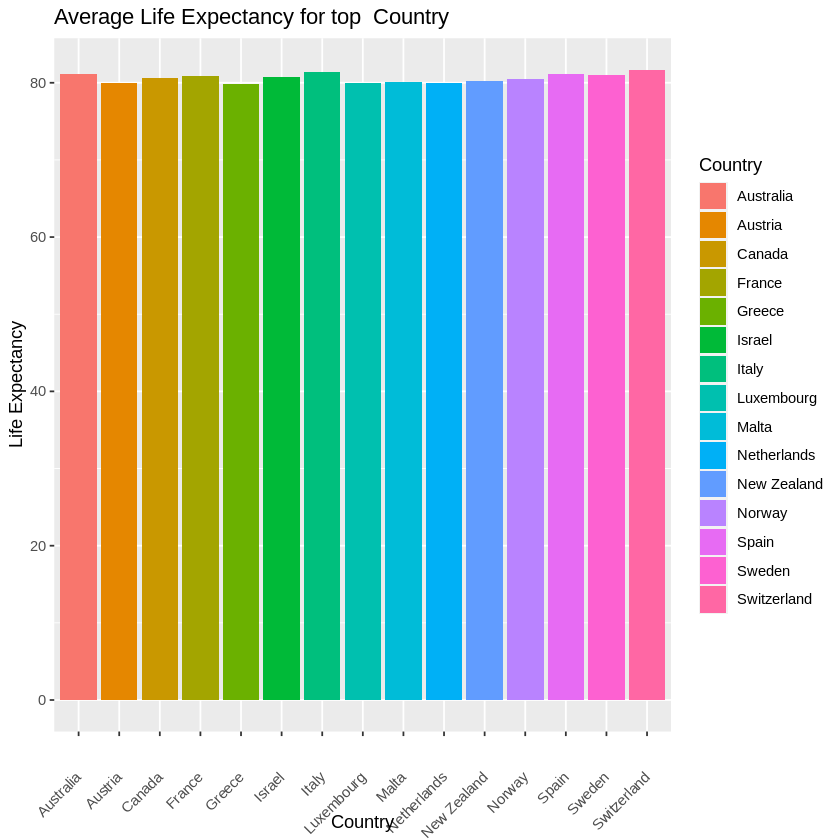

In [13]:
plot1 <- ggplot (data = top15, aes (Country, Life.Expectancy, fill = Country)) +
         geom_bar(stat = 'identity') + labs(title = "Average Life Expectancy for top  Country", y= "Life Expectancy") +
         theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))
plot1


From the graph we can see that the average life expectancy has been above 80 in Italy, Australia, Switzerland, Canada And France. 

## Life Expectancy vs Year 

Let's check the life expectancy across the year.

In [14]:
by_year <- aggregate(Life.Expectancy ~ Year, data = mydata, FUN = mean)


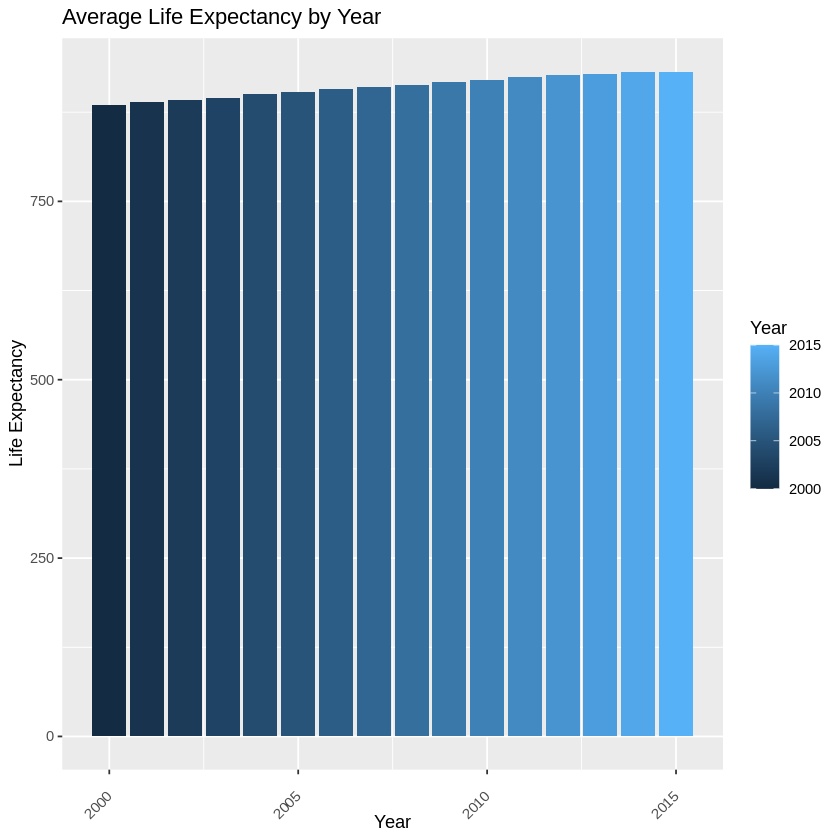

In [15]:
plot2 <- ggplot (data = df, aes (Year, Life.Expectancy, fill = Year)) +
         geom_bar(stat = 'identity') + labs(title = "Average Life Expectancy by Year", y= "Life Expectancy")+
         theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))  +
         scale_color_gradient(low = "white", high = "red")
plot2


## CO2 emmission vs Country 

We will find the top 15 countries who have the higest CO2 emissions and plot a graph for it. 

In [16]:
mean_Co2 <- subset (aggregate (CO2.emissions ~ Country, data = mydata, FUN = mean))
mean_Co2 <- mean_Co2%>%
    arrange (desc(mean_Co2$CO2.emissions))

top15_CO2 <- top_n (mean_Co2, 15)
head(top15_CO2)


Selecting by CO2.emissions



,Country,CO2.emissions
,<chr>,<dbl>
1,Qatar,40.17607
2,Kuwait,26.63673
3,Bahrain,22.28434
4,Luxembourg,21.40363
5,United States,18.07964
6,Australia,17.54908


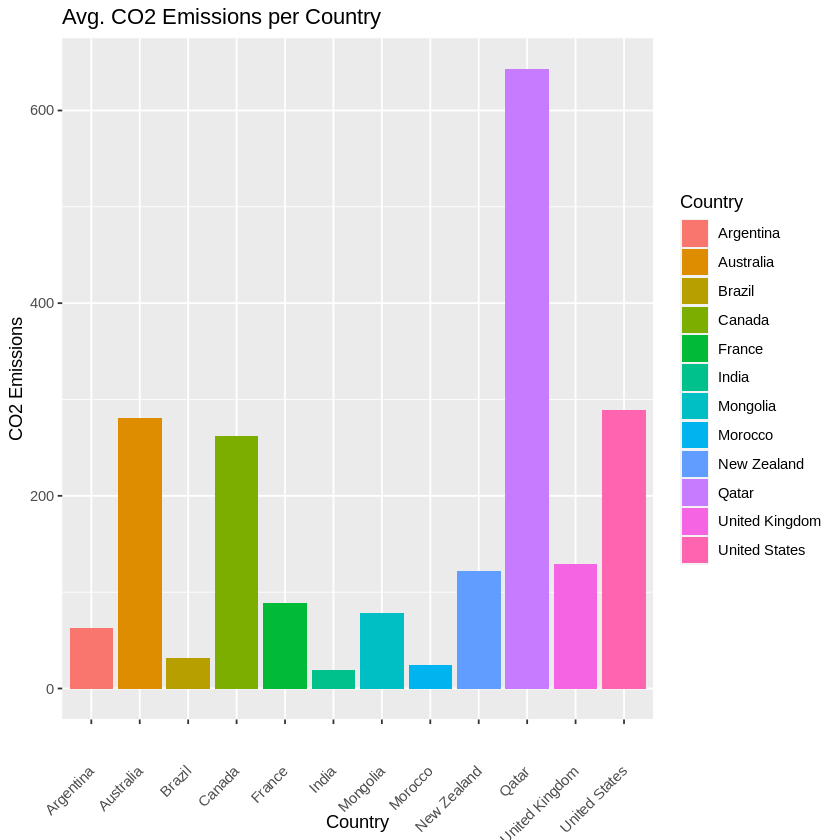

In [17]:
plot3 <- ggplot (data = df, aes (Country, CO2.emissions, fill = Country)) +
         geom_bar(stat = 'identity') + labs(title = "Avg. CO2 Emissions per Country", y= "CO2 Emissions")+
         theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))
plot3


From the graph we can see that Qatar has the highest CO2 emissions and Kuwait is second in the list. 

## CO2 Emission by Years

Let's plot for the CO2 emissions across the year using the whole dataset 


In [18]:
CO2by_year <- aggregate(CO2.emissions ~ Year, data = mydata, FUN = mean)


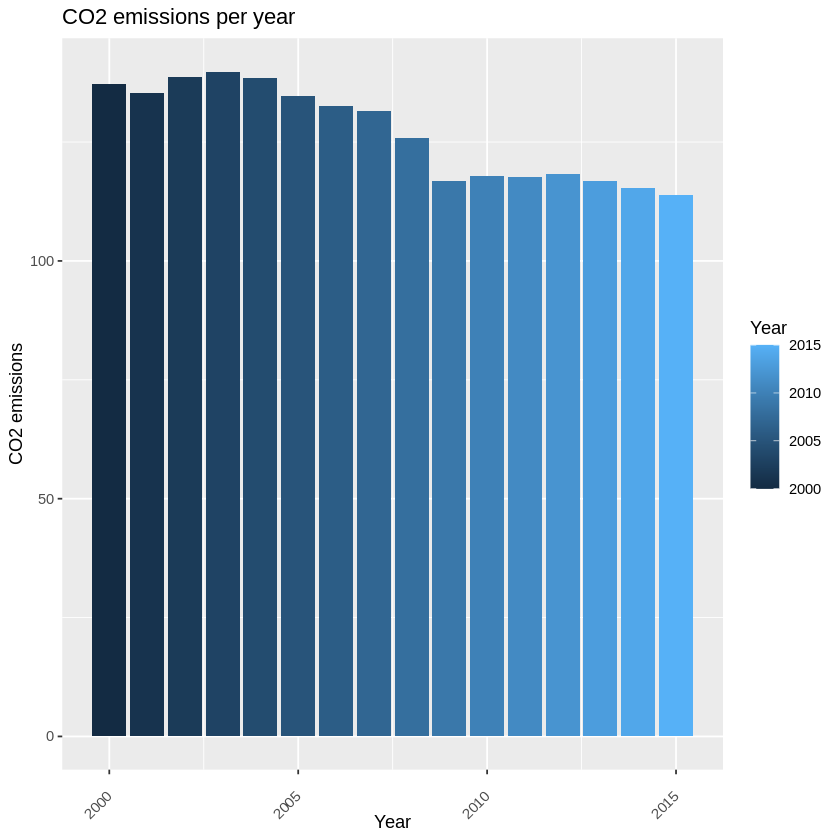

In [19]:
plot4 <- ggplot (data = df, aes (Year, CO2.emissions, fill = Year)) + geom_bar(stat = "identity") + 
         labs(title = "CO2 emissions per year", y= "CO2 emissions")+
         theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1)) 
plot4


## Life Expectancy vs CO2 emission

Let's check for Life Expectancy relation with the CO2 emission. 

List of 1
 $ title: chr "Average Life Expectancy vs. CO2 Emissions (By Country)"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

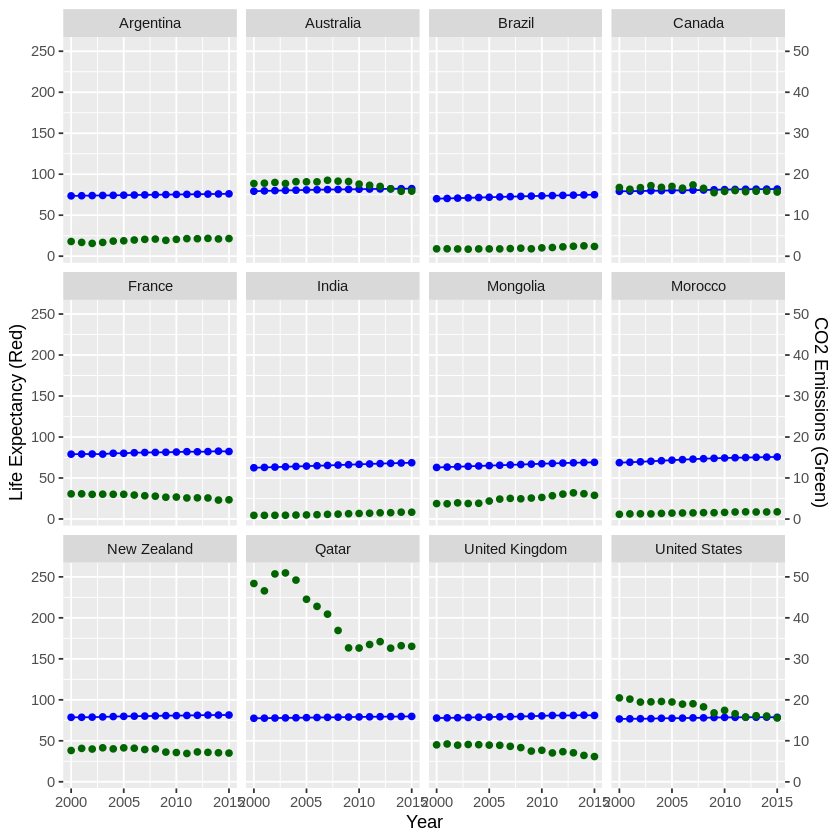

In [20]:
plot5 <- ggplot (data = df, aes(x = Year)) + 
         geom_line(aes (y = Life.Expectancy), color = 'blue') +
         facet_wrap(~Country) + 
         scale_y_continuous (name = 'Life Expectancy (Red)',sec.axis = sec_axis(~./5, name = 'CO2 Emissions (Green)'))
         theme(title=element_text(size=11))+ labs(title = "Average Life Expectancy vs. CO2 Emissions (By Country)")
plot5 + geom_point(aes(y = Life.Expectancy), color = 'blue') +
        geom_point(aes(y = CO2.emissions*5), color = "dark green") 






In [21]:
df1 <- df %>%
    group_by(Country) %>%
    summarize (mean_Health.Exp = mean(Health.expenditure))

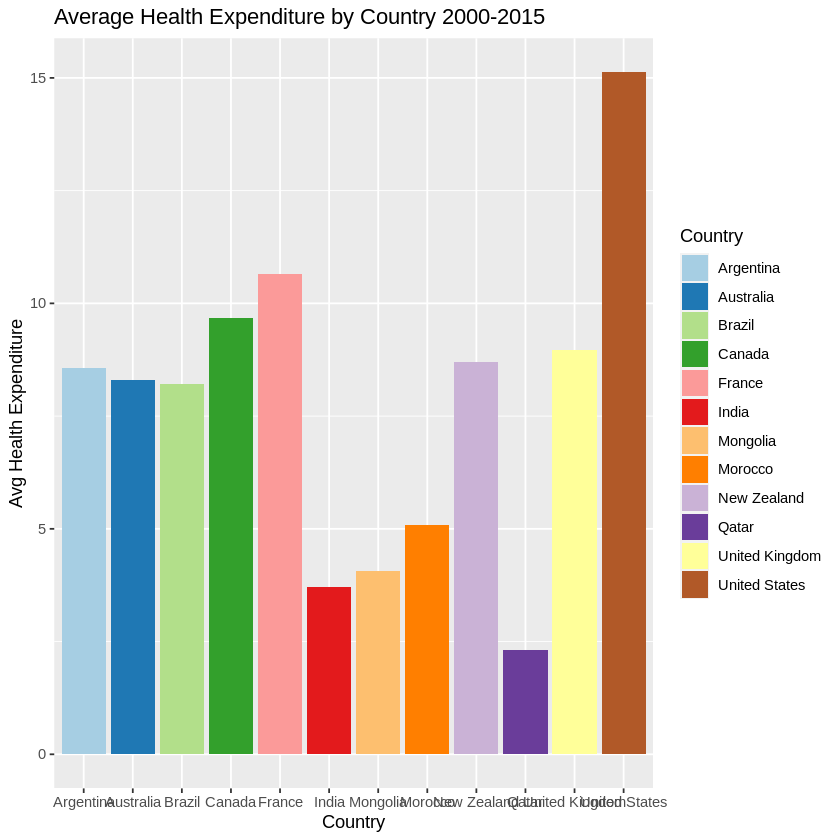

In [22]:
plot6 <- ggplot(df1, aes (x = Country, y = mean_Health.Exp, group = Country, fill = Country))+ 
         geom_bar(stat = "identity") + scale_fill_brewer(palette = 'Paired') + 
         labs(title = "Average Health Expenditure by Country 2000-2015", x ="Country", y= "Avg Health Expenditure")
plot6



In [23]:
df2 <- mydata %>%  
  group_by(Country) %>%
  summarize(Avg.Health.exp = mean(Health.expenditure), Avg.Life.exp = mean(Life.Expectancy)) %>%
  data.frame()     


`geom_smooth()` using formula 'y ~ x'



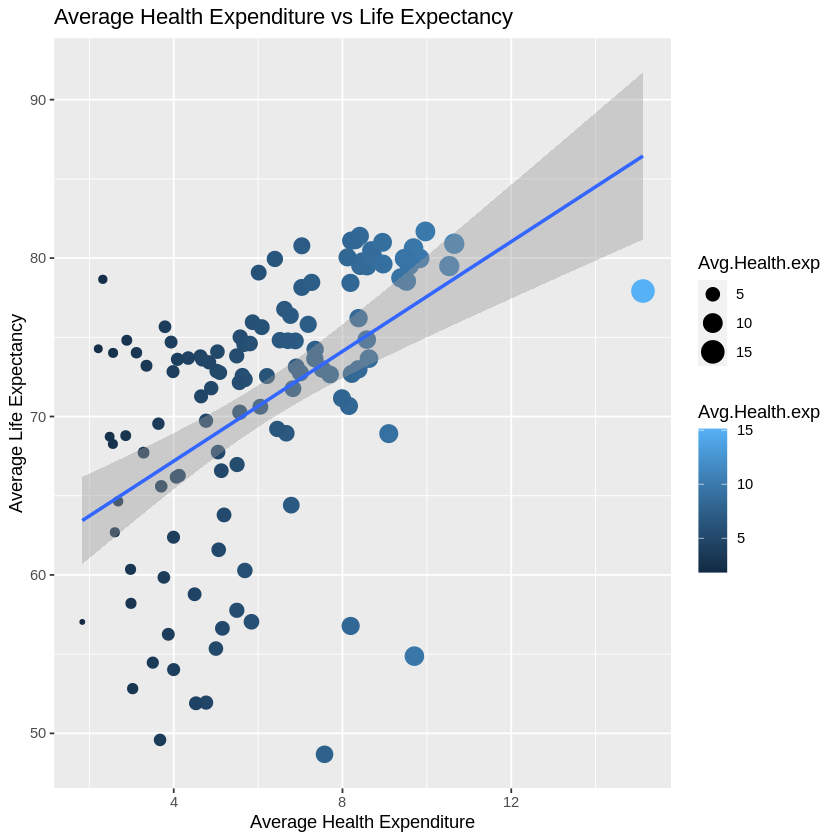

In [24]:
plot7 <- ggplot(df2, aes(x= Avg.Health.exp, y= Avg.Life.exp)) + 
         geom_point(aes(size = Avg.Health.exp, color = Avg.Health.exp)) + 
         stat_smooth(method = "lm", se = TRUE)+
         labs(title = "Average Health Expenditure vs Life Expectancy", x= "Average Health Expenditure", y= "Average Life Expectancy")
plot7


We will now plot the corelation plot and see the relation between the variables. 

Let's Plot a Correlation Plot to get a insight of the data 

Warning message in ggcorr(mydata, label = TRUE, label_size = 4, label_round = 2, :
“data in column(s) 'Country', 'Continent', 'Least.Developed' are not numeric and were ignored”


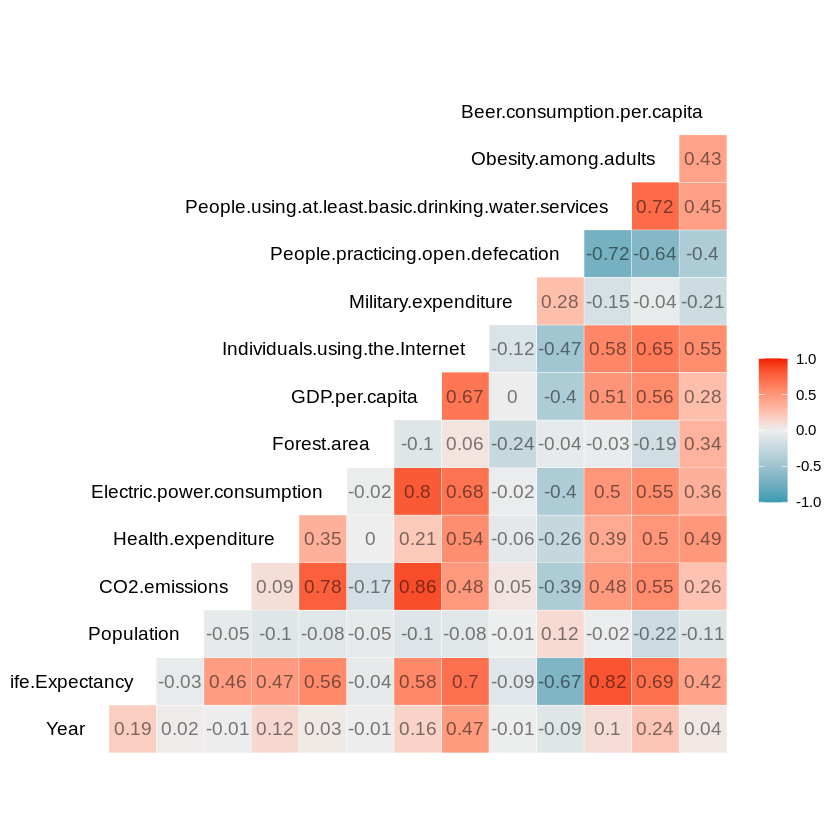

In [25]:
corr_plot <- ggcorr (mydata, label = TRUE, label_size = 4, label_round =2, 
                     label_alpha=0.5, hjust=1, size=4, layout.exp=1)

corr_plot

## Regression Models 

For modelling we will convert the Life.Expectancy to binary. We will consider any value that is above 70 as good and we will assign it value 1. For any value below 70 we will make it 0. 


In [26]:
mydata1 <- subset(mydata, Life.Expectancy < 70 | Life.Expectancy > 70)

mydata1$Good_Life.Exp <- 0 

mydata1$Good_Life.Exp [mydata$Life.Expectancy > 70] <- 1

mydata1$Life.Expectancy <- NULL

head(mydata1)

,Country,Year,Continent,Least.Developed,Population,CO2.emissions,Health.expenditure,Electric.power.consumption,Forest.area,GDP.per.capita,Individuals.using.the.Internet,Military.expenditure,People.practicing.open.defecation,People.using.at.least.basic.drinking.water.services,Obesity.among.adults,Beer.consumption.per.capita,Good_Life.Exp
,<chr>,<int>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2000,Europe,FALSE,3089027,1.026213,7.233370,1414.704,28.07664,3860.805,0.1140973,1.246360,0.8888528,86.75447,12.8,1.33431,1
2,Albania,2001,Europe,FALSE,3060173,1.055496,7.139524,1449.647,28.12325,4299.546,0.3257984,1.309291,0.8363971,86.90407,13.3,1.48995,1
3,Albania,2002,Europe,FALSE,3051010,1.232379,6.909341,1351.231,28.16985,4661.403,0.3900813,1.320034,0.7818988,87.45164,13.9,1.28697,1
4,Albania,2003,Europe,FALSE,3039616,1.338985,7.063490,1578.166,28.21646,5000.049,0.9719004,1.336843,0.7281910,87.98719,14.4,1.44830,1
5,Albania,2004,Europe,FALSE,3026939,1.404059,6.773372,1469.265,28.26307,5427.733,2.4203878,1.381158,0.6752808,88.51058,15.0,1.37617,1
6,Albania,2005,Europe,FALSE,3011487,1.338209,6.335542,1797.525,28.30967,5865.302,6.0438909,1.350005,0.6231982,89.02119,15.6,1.65180,1


In [27]:

mydata1<- select (mydata1, -c("Country", "Year", "Continent", "Least.Developed", "Population"))
head(mydata1)


,CO2.emissions,Health.expenditure,Electric.power.consumption,Forest.area,GDP.per.capita,Individuals.using.the.Internet,Military.expenditure,People.practicing.open.defecation,People.using.at.least.basic.drinking.water.services,Obesity.among.adults,Beer.consumption.per.capita,Good_Life.Exp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.026213,7.233370,1414.704,28.07664,3860.805,0.1140973,1.246360,0.8888528,86.75447,12.8,1.33431,1
2,1.055496,7.139524,1449.647,28.12325,4299.546,0.3257984,1.309291,0.8363971,86.90407,13.3,1.48995,1
3,1.232379,6.909341,1351.231,28.16985,4661.403,0.3900813,1.320034,0.7818988,87.45164,13.9,1.28697,1
4,1.338985,7.063490,1578.166,28.21646,5000.049,0.9719004,1.336843,0.7281910,87.98719,14.4,1.44830,1
5,1.404059,6.773372,1469.265,28.26307,5427.733,2.4203878,1.381158,0.6752808,88.51058,15.0,1.37617,1
6,1.338209,6.335542,1797.525,28.30967,5865.302,6.0438909,1.350005,0.6231982,89.02119,15.6,1.65180,1


We now have a new column Good_Life.Exp for countries with Life expectancy above 70

In [28]:
set.seed(144)
split=sample.split(mydata1$Good_Life.Exp,SplitRatio = 0.7)
train=subset(mydata1,split==TRUE)
test=subset(mydata1,split==FALSE)

head(train)



,CO2.emissions,Health.expenditure,Electric.power.consumption,Forest.area,GDP.per.capita,Individuals.using.the.Internet,Military.expenditure,People.practicing.open.defecation,People.using.at.least.basic.drinking.water.services,Obesity.among.adults,Beer.consumption.per.capita,Good_Life.Exp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.026213,7.233370,1414.704,28.07664,3860.805,0.1140973,1.246360,0.8888528,86.75447,12.8,1.33431,1
4,1.338985,7.063490,1578.166,28.21646,5000.049,0.9719004,1.336843,0.7281910,87.98719,14.4,1.44830,1
5,1.404059,6.773372,1469.265,28.26307,5427.733,2.4203878,1.381158,0.6752808,88.51058,15.0,1.37617,1
6,1.338209,6.335542,1797.525,28.30967,5865.302,6.0438909,1.350005,0.6231982,89.02119,15.6,1.65180,1
7,1.339996,6.009277,1722.073,28.35628,6566.573,9.6099913,1.567769,0.5719348,89.51913,16.2,1.79330,1
9,1.384311,5.139062,1213.124,28.44949,8228.348,23.8600000,1.984869,0.4719029,90.47615,17.5,2.12835,1


In [29]:
table(mydata1$Good_Life.Exp)


   0    1 
 642 1262 

## Logistic Regression

In [30]:
log_model1 = glm (Good_Life.Exp~. , data = train, family = binomial)
summary(log_model1)

predictions <- predict(log_model1, newdata = test, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)
accuracy <- mean(predicted_classes == test$Good_Life.Exp)


Call:
glm(formula = Good_Life.Exp ~ ., family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.95261  -0.04465   0.02726   0.22012   3.04524  

Coefficients:
                                                      Estimate Std. Error
(Intercept)                                         -1.495e+01  1.845e+00
CO2.emissions                                       -4.163e-01  7.751e-02
Health.expenditure                                   4.902e-01  9.095e-02
Electric.power.consumption                           3.412e-05  1.228e-04
Forest.area                                          4.101e-02  7.633e-03
GDP.per.capita                                       2.369e-04  3.214e-05
Individuals.using.the.Internet                       4.020e-02  9.738e-03
Military.expenditure                                 2.022e-01  1.148e-01
People.practicing.open.defecation                   -1.184e-01  1.813e-02
People.using.at.least.basic.drinking.water.servi

## Chi-square Test 

Let's perform the Chi-square test to check for significant difference between life expectancy and CO2 emissions. 

In [31]:
test1 <- chisq.test(table(mydata1$Good_Life.Exp, mydata$CO2.emissions))
test1

Warning message in chisq.test(table(mydata1$Good_Life.Exp, mydata$CO2.emissions)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(mydata1$Good_Life.Exp, mydata$CO2.emissions)
X-squared = 1904, df = 1903, p-value = 0.4892


A p-value of 0.4892 suggests if there is difference in the predicted value and the given values as the p-value is very high there is not sufficient evidence to reject the null hypothesis at the chosen level of significance. 

In [32]:
test2 <- chisq.test(table(mydata1$Good_Life.Exp, mydata$CO2.emissions))
test2

Warning message in chisq.test(table(mydata1$Good_Life.Exp, mydata$CO2.emissions)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(mydata1$Good_Life.Exp, mydata$CO2.emissions)
X-squared = 1904, df = 1903, p-value = 0.4892


Same is the case for the Health.expenditure

In [33]:
test3 <- chisq.test(table(mydata1$Good_Life.Exp, mydata$People.using.at.least.basic.drinking.water.services))
test3 


Warning message in chisq.test(table(mydata1$Good_Life.Exp, mydata$People.using.at.least.basic.drinking.water.services)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(mydata1$Good_Life.Exp, mydata$People.using.at.least.basic.drinking.water.services)
X-squared = 1904, df = 1707, p-value = 0.0005546


The results of the chi-squared test indicates whether the differences between the predicted
values and the true values are statistically significant. Since the p-value = 0.0005546 is less than 0.05, the
model is considered to be statistically significant. 

## PCA Analysis 

Let's plot a PCA plot for our model. First we will normalize the data and then plot.

In [34]:
standard_vars <- as.data.frame(scale(mydata1[!sapply(mydata1,class) %in% c ('factor', 'character')]))
dim(standard_vars)
head(standard_vars)

[1] 1904   12

,CO2.emissions,Health.expenditure,Electric.power.consumption,Forest.area,GDP.per.capita,Individuals.using.the.Internet,Military.expenditure,People.practicing.open.defecation,People.using.at.least.basic.drinking.water.services,Obesity.among.adults,Beer.consumption.per.capita,Good_Life.Exp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.6963586,0.46360229,-0.5237359,-0.1184564,-0.7340606,-1.0665660,-0.3234254,-0.4968913,-0.004662131,-0.41558909,-0.4544929,0.7130562
2,-0.6916499,0.42532092,-0.5160502,-0.1162218,-0.7114331,-1.0589436,-0.3022351,-0.4999142,0.003836344,-0.35471285,-0.3727250,0.7130562
3,-0.6632071,0.33142584,-0.5376965,-0.1139871,-0.6927710,-1.0566290,-0.2986177,-0.5030548,0.034942467,-0.28166135,-0.4793638,0.7130562
4,-0.6460648,0.39430544,-0.4877831,-0.1117525,-0.6753058,-1.0356802,-0.2929579,-0.5061498,0.065366548,-0.22078510,-0.3946065,0.7130562
5,-0.6356009,0.27596190,-0.5117355,-0.1095178,-0.6532487,-0.9835264,-0.2780361,-0.5091989,0.095099286,-0.14773361,-0.4325011,0.7130562
6,-0.6461895,0.09736405,-0.4395359,-0.1072831,-0.6306818,-0.8530595,-0.2885260,-0.5122003,0.124105810,-0.07468211,-0.2876945,0.7130562


In [35]:
mydata_pca <- prcomp (standard_vars)
summary(mydata_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3782 1.3070 1.05862 1.00905 0.85317 0.66520 0.56342
Proportion of Variance 0.4713 0.1424 0.09339 0.08485 0.06066 0.03687 0.02645
Cumulative Proportion  0.4713 0.6137 0.70708 0.79193 0.85259 0.88946 0.91591
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.53723 0.49000 0.47662 0.41250 0.28808
Proportion of Variance 0.02405 0.02001 0.01893 0.01418 0.00692
Cumulative Proportion  0.93997 0.95997 0.97890 0.99308 1.00000

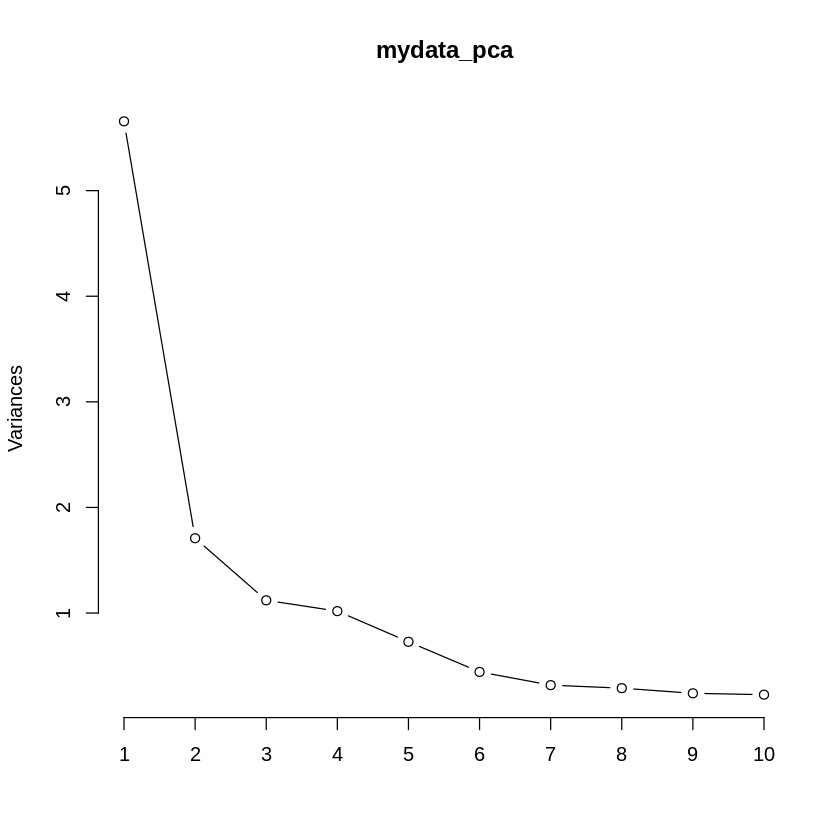

In [36]:
screeplot(mydata_pca, type="lines")

The most obvious change in slope in the scree plot occurs at component 6, therefore first five components should be retained.


In [37]:
(mydata_pca$sdev)^2

[1] 5.65596995 1.70832271 1.12066798 1.01818355 0.72789932 0.44248731
 [7] 0.31744290 0.28861360 0.24009573 0.22716974 0.17015959 0.08298762

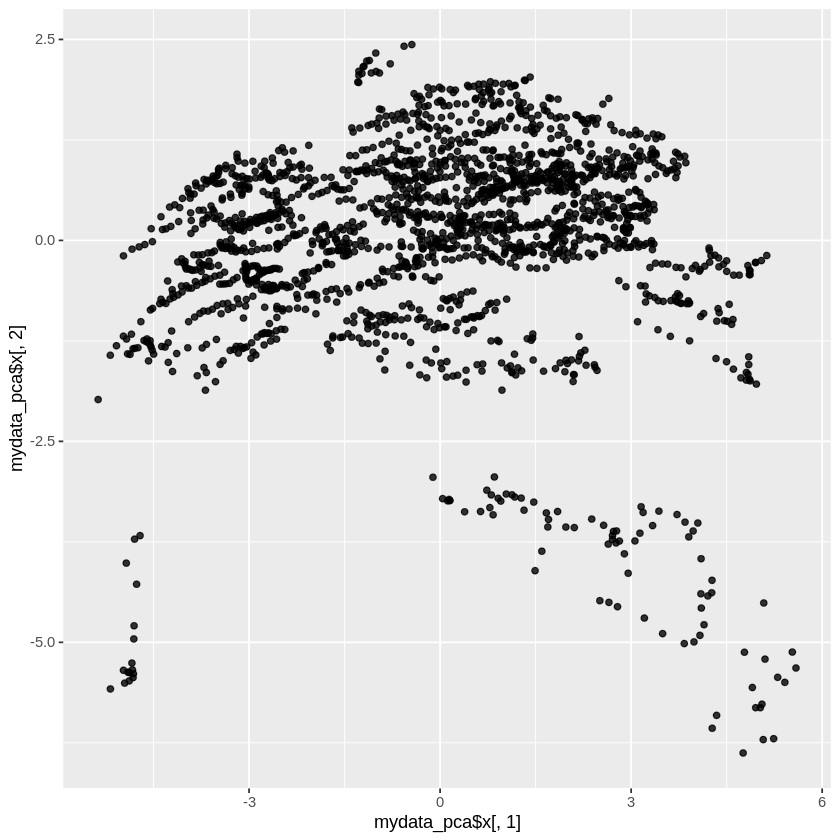

In [38]:
library(ggplot2)
pca_comp1_comp2 <- ggplot(mydata, aes(x=mydata_pca$x[,1],y=mydata_pca$x[,2]))

pca_comp1_comp2+geom_point(alpha = 0.8)

In [39]:
norm <- scale(mydata1) 

Warning message:
“In prcomp.default(norm, cor = TRUE, scores = TRUE) :
 extra arguments ‘cor’, ‘scores’ will be disregarded”


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3782 1.3070 1.05862 1.00905 0.85317 0.66520 0.56342
Proportion of Variance 0.4713 0.1424 0.09339 0.08485 0.06066 0.03687 0.02645
Cumulative Proportion  0.4713 0.6137 0.70708 0.79193 0.85259 0.88946 0.91591
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.53723 0.49000 0.47662 0.41250 0.28808
Proportion of Variance 0.02405 0.02001 0.01893 0.01418 0.00692
Cumulative Proportion  0.93997 0.95997 0.97890 0.99308 1.00000

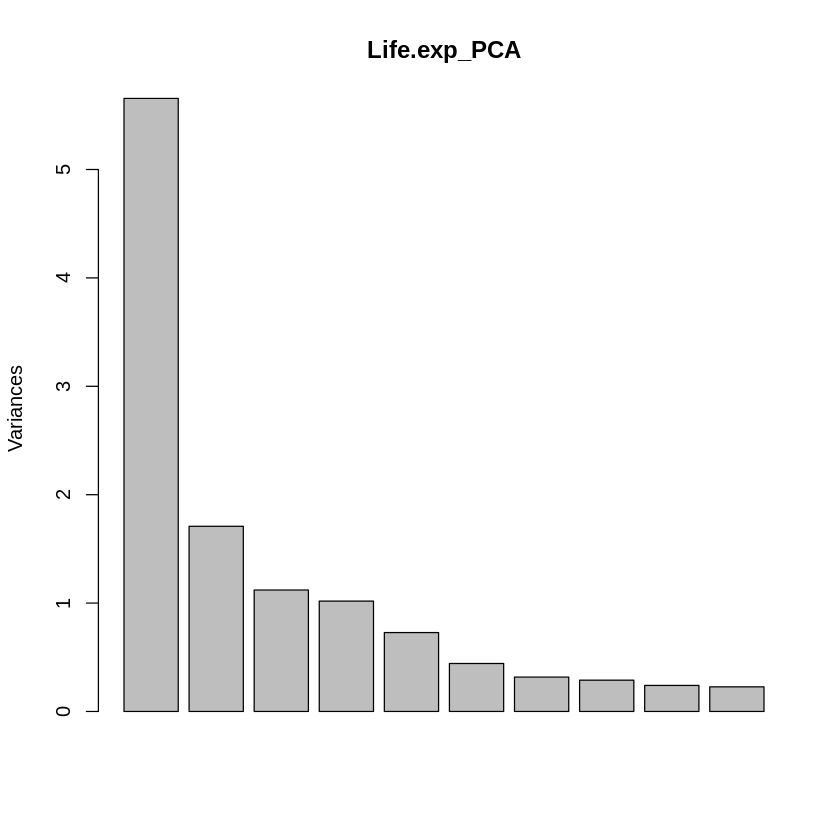

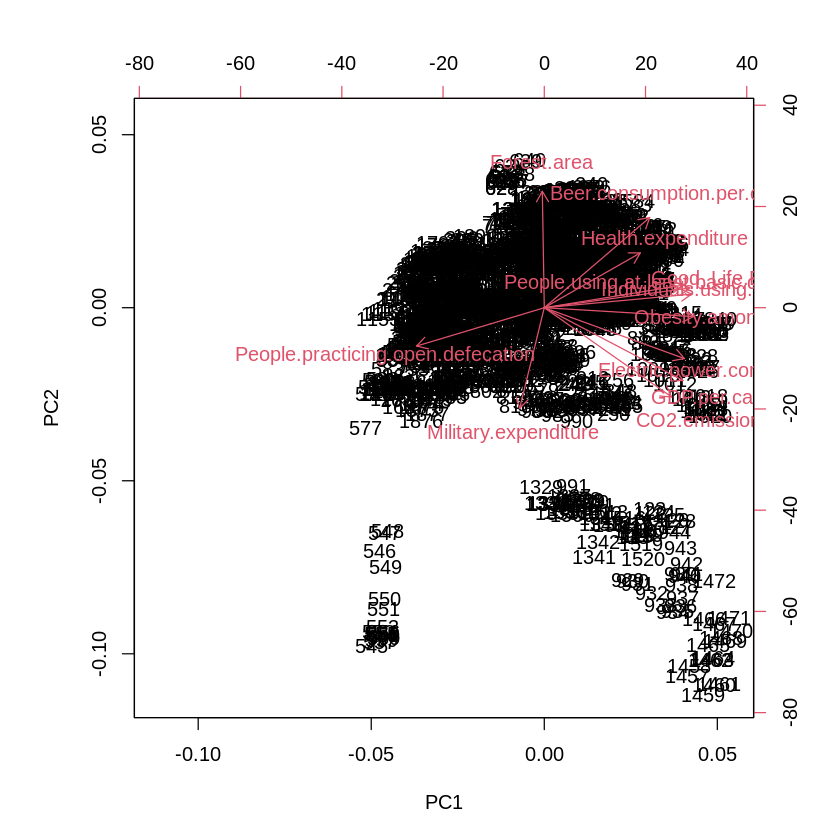

In [40]:
Life.exp_PCA <- prcomp(norm, cor = TRUE, scores = TRUE)
summary(Life.exp_PCA)

plot(Life.exp_PCA)
biplot(Life.exp_PCA)


## Factor Analysis 

In [41]:
n.factors <- 5

fit <- factanal(mydata1, n.factors,  scores=c("regression"), rotation="none") # number of factors to extract
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = mydata1, factors = n.factors, scores = c("regression"),     rotation = "none")

Uniquenesses:
                                      CO2.emissions 
                                               0.00 
                                 Health.expenditure 
                                               0.40 
                         Electric.power.consumption 
                                               0.23 
                                        Forest.area 
                                               0.51 
                                     GDP.per.capita 
                                               0.12 
                     Individuals.using.the.Internet 
                                               0.16 
                               Military.expenditure 
                                               0.81 
                  People.practicing.open.defecation 
                                               0.27 
People.using.at.least.basic.drinking.w

In [42]:
head(fit$scores)

,Factor1,Factor2,Factor3,Factor4,Factor5
1,-0.6957229,0.09124586,-0.8544653,-0.4630260,-0.1850955
2,-0.6887544,0.12515875,-0.8303033,-0.4956889,-0.1595172
3,-0.6616199,0.08897737,-0.9319055,-0.4626544,-0.1864740
4,-0.6420522,0.13728296,-0.8965873,-0.4846529,-0.1288317
5,-0.6302359,0.14360024,-0.9490929,-0.4510111,-0.1585490
6,-0.6338684,0.23694486,-0.8692967,-0.4469107,-0.1917250



## Random Forest

In [43]:
library(rpart)
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [44]:
fit=train(Good_Life.Exp~.,method="rpart",data=train)
fit


Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


CART 

1332 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1332, 1332, 1332, 1332, 1332, 1332, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE      
  0.04159305  0.2974034  0.6055228  0.1654415
  0.07186211  0.3185607  0.5462783  0.1954612
  0.53684263  0.3907587  0.4983889  0.3055283

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.04159305.

## Train Data 

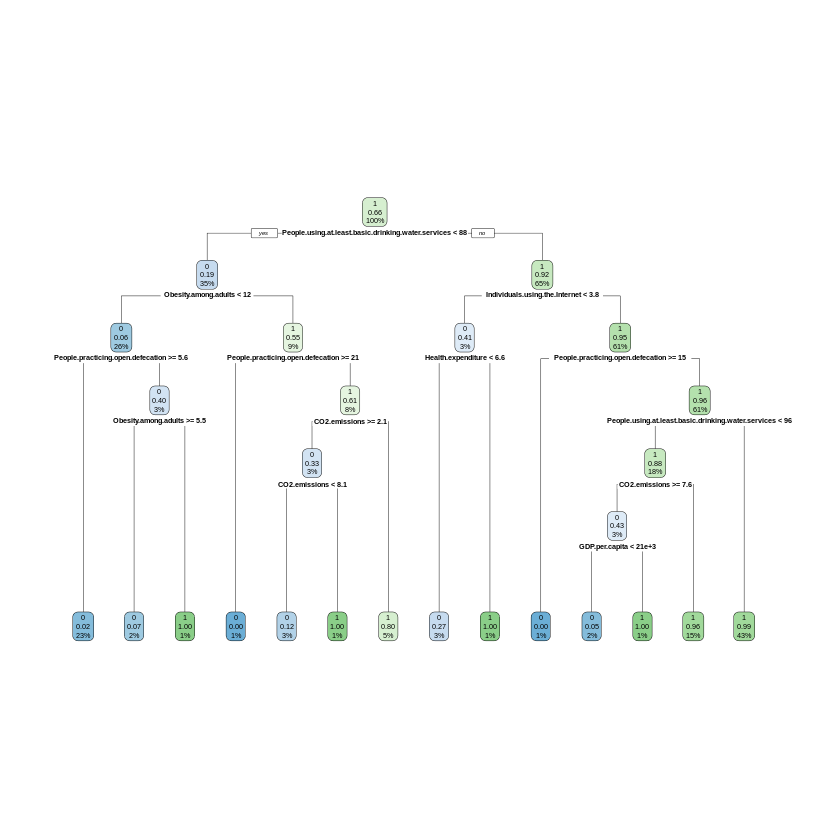

In [45]:
rpart_fit <- rpart(Good_Life.Exp~.,method="class",data=train) 
library(rpart.plot)
rpart.plot(rpart_fit)

## Test Data

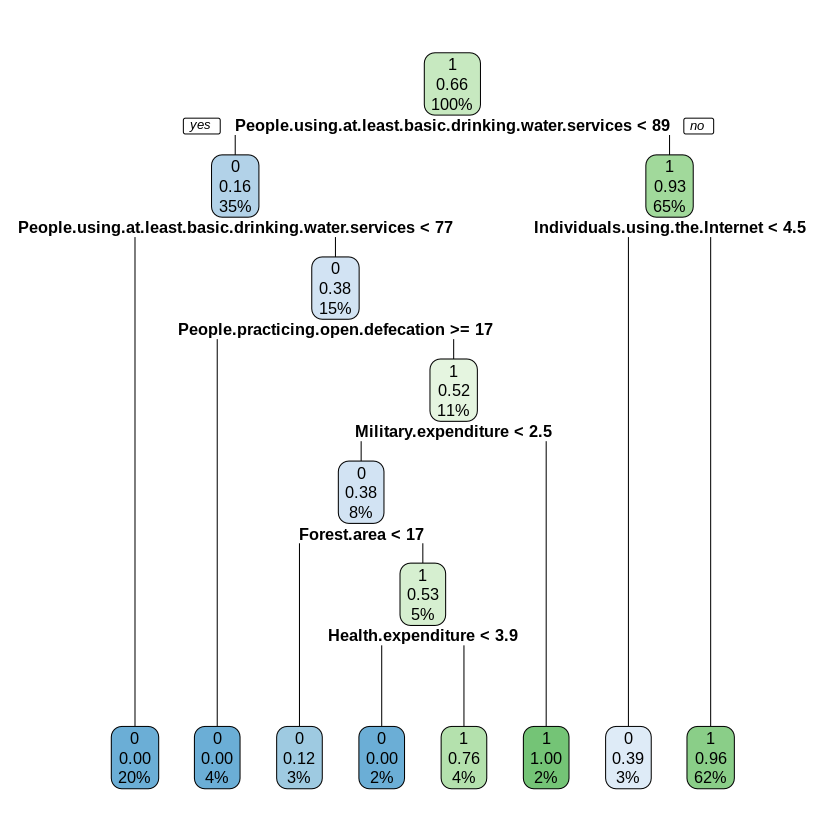

In [46]:
rpart_fit1 <- rpart(Good_Life.Exp~.,method="class",data=test) 
library(rpart.plot)
rpart.plot(rpart_fit1)

## T-test 

Let's first check normality of the variable Life Expectancy. 

In [47]:
summary(mydata)

   Country               Year       Continent         Least.Developed
 Length:1904        Min.   :2000   Length:1904        Mode :logical  
 Class :character   1st Qu.:2004   Class :character   FALSE:1648     
 Mode  :character   Median :2008   Mode  :character   TRUE :256      
                    Mean   :2008                                     
                    3rd Qu.:2011                                     
                    Max.   :2015                                     
 Life.Expectancy   Population        CO2.emissions      Health.expenditure
 Min.   :43.06   Min.   :3.332e+05   Min.   : 0.03242   Min.   : 0.410    
 1st Qu.:66.86   1st Qu.:4.219e+06   1st Qu.: 1.00111   1st Qu.: 4.215    
 Median :73.01   Median :1.077e+07   Median : 3.54553   Median : 5.862    
 Mean   :70.82   Mean   :5.076e+07   Mean   : 5.35680   Mean   : 6.097    
 3rd Qu.:76.77   3rd Qu.:3.692e+07   3rd Qu.: 7.62909   3rd Qu.: 7.881    
 Max.   :83.23   Max.   :1.380e+09   Max.   :50.95403   Max.

H0 = The null hypothesis is that the mean of Life Expectancy is 70.82.


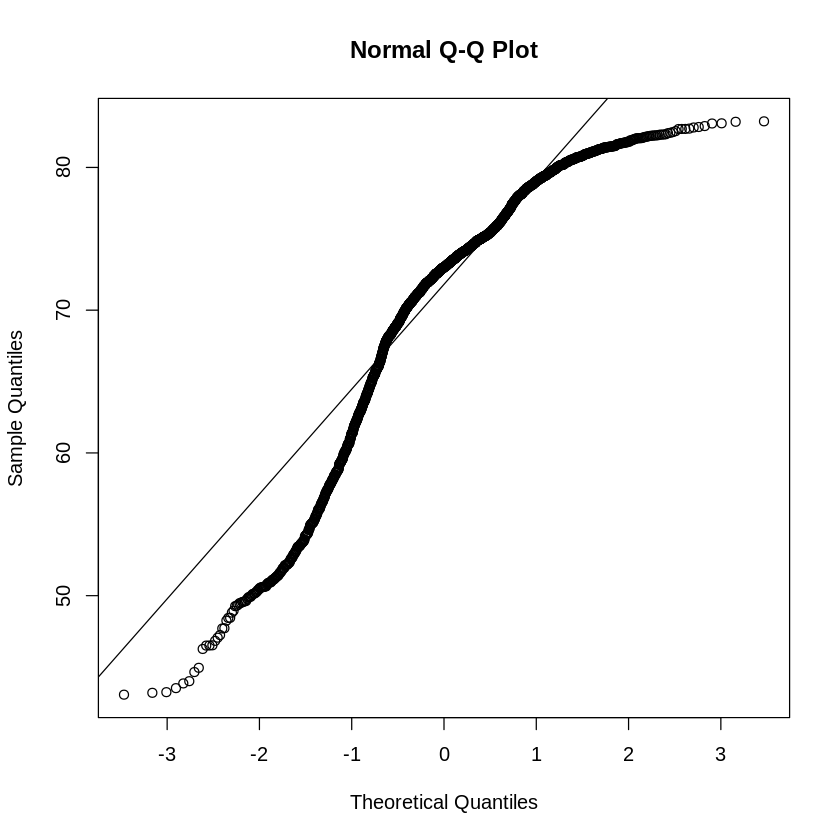

In [48]:
qqnorm(mydata$Life.Expectancy) 

qqline(mydata$Life.Expectancy)

In [49]:
shapiro.test(mydata$Life.Expectancy)


	Shapiro-Wilk normality test

data:  mydata$Life.Expectancy
W = 0.91259, p-value < 2.2e-16


In [50]:

test <- t.test (mydata$Life.Expectancy, mu =70.82)
test
        


	One Sample t-test

data:  mydata$Life.Expectancy
t = -0.013655, df = 1903, p-value = 0.9891
alternative hypothesis: true mean is not equal to 70.82
95 percent confidence interval:
 70.43579 71.19890
sample estimates:
mean of x 
 70.81734 


For the T-test we will take the original data set and test for the null hypothesis. 

Conclusion : From the qqnorm plot we can see that the data for the life expectancy is normally distributed, as the value for it is almost zero. If the p-value very close to zero it would indicate that the observed data is significantly different from the theoretical distribution being tested.

The results of the t-test indicate that there is not enough evidence to reject the null hypothesis that the true mean life expectancy is equal to 70.82. The t-value is very small (-0.013655) and the associated p-value is very high (0.9891), indicating that the observed data is consistent with the null hypothesis. The 95% confidence interval for the true mean is relatively narrow, ranging from 70.43579 to 71.19890, which provides a range of plausible values for the true population mean.

The sample mean (70.81734) is close to the hypothesized mean of 70.82, but this small difference is not statistically significant given the high p-value. The alternative hypothesis is that the true mean is not equal to 70.82, but the evidence does not support this hypothesis at the chosen level of significance.

Overall, these results suggest that there is no significant difference between the observed mean life expectancy and the hypothesized value of 70.82. Note:- This conclusion is based on the assumption that the data is normally distributed and that other underlying assumptions of the t-test have been met. 